<a href="https://colab.research.google.com/github/rizkynindra/BI_hackathon/blob/main/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
import mediapipe as mp
import cv2
from PIL import Image
import numpy as np

### Loading the model

In [ ]:
face_detection = mp.solutions.face_detection
detectmodel = face_detection.FaceDetection(min_detection_confidence=0.7)

### Reading the image

In [ ]:
## please make sure the path of the image is correct and available

img1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/FACE DETECTION/DSC_6470_1x1.jpg")
img2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/FACE DETECTION/end_0003_1x1.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)


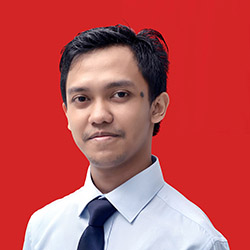

In [ ]:
x = Image.fromarray(img1)
x

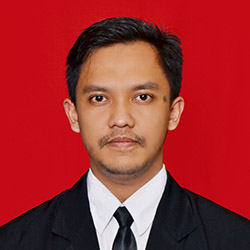

In [ ]:
y = Image.fromarray(img2)
y

### Detection of Faces

In [ ]:
## target size for face net is (none,160,160,3)

In [ ]:
detect1 = detectmodel.process(img1)
detect2 = detectmodel.process(img2)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
bbox1 = detect1.detections[0].location_data.relative_bounding_box
bbox2 = detect2.detections[0].location_data.relative_bounding_box

In [ ]:
print(f"img1: {img1.shape}")
print(f"img2: {img2.shape}")

img1: (250, 250, 3)
img2: (250, 250, 3)


In [ ]:
## cropping the image at the bounding box
## img1
lx1 = int(bbox1.xmin*250)
ly1 = int(bbox1.ymin*250)
rx1 = int(bbox1.width*250+lx1)
ry1 = int(bbox1.height*250+ly1)
crop1 = img1[ly1:ry1,lx1:rx1]

In [ ]:
lx2 = int(bbox2.xmin*250)
ly2 = int(bbox2.ymin*250)
rx2 = int(bbox2.width*250+lx2)
ry2 = int(bbox2.height*250+ly2)
crop2 = img2[ly2:ry2,lx2:rx2]

In [ ]:
print(f"crop1 : {crop1.shape}")
print(f"crop2 : {crop2.shape}")

crop1 : (87, 87, 3)
crop2 : (102, 102, 3)


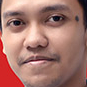

In [ ]:
Image.fromarray(crop1)

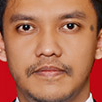

In [ ]:
Image.fromarray(crop2)

## Resize the faces to (160,160,3) which is ideal for FaceNet

In [ ]:
print(f"crop1 : {crop1.shape}")
print(f"crop2 : {crop2.shape}")

crop1 : (87, 87, 3)
crop2 : (102, 102, 3)


In [ ]:
target_size = (160,160,3)

In [ ]:
## resizing the crop1
factor1 = target_size[0]/crop1.shape[0]
factor2 = target_size[1]/crop1.shape[1]

minfact = min(factor1,factor2)

resize = (int(crop1.shape[1]*minfact),int(crop1.shape[0]*minfact))

In [ ]:
rescrop1 = cv2.resize(crop1,resize)

In [ ]:
rescrop1.shape

(160, 160, 3)

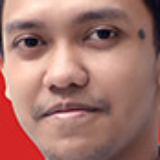

In [ ]:
Image.fromarray(rescrop1)

In [ ]:
## resizing for crop2
factor1 = target_size[0]/crop2.shape[0]
factor2 = target_size[0]/crop2.shape[1]

minfact = min(factor1,factor2)
resize = resize = (int(crop2.shape[1]*minfact),int(crop2.shape[0]*minfact))

rescrop2 = cv2.resize(crop2,resize)

In [ ]:
rescrop2.shape

(160, 160, 3)

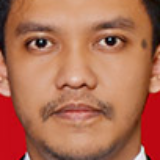

In [ ]:
Image.fromarray(rescrop2)

In [ ]:
firstimage = np.expand_dims(rescrop1/255,0)
secondimage = np.expand_dims(rescrop2/255,0)

### from the above steps we have taken a image and extracted the face out of the iamge and resized to the target size , now we can pass the faces to the network for finding the face embedding and then we will calculate the similarrity between the embedding to recognize both image are same or not

## Face Recognition

In [ ]:
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Activation
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras.layers import Concatenate
    from tensorflow.keras.layers import Conv2D
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.layers import GlobalAveragePooling2D
    from tensorflow.keras.layers import Input
    from tensorflow.keras.layers import Lambda
    from tensorflow.keras.layers import MaxPooling2D
    from tensorflow.keras.layers import add
    from tensorflow.keras import backend as K
    import tensorflow as tf
    import gdown

### Building the model architecture and Loading the pretrained weights

In [ ]:
def scaling(x, scale):
    return x * scale


def InceptionResNetV2(dimension=512):

    inputs = Input(shape=(160, 160, 3))
    x = Conv2D(32, 3, strides=2, padding="valid", use_bias=False, name="Conv2d_1a_3x3")(inputs)
    x = BatchNormalization(
        axis=3, momentum=0.995, epsilon=0.001, scale=False, name="Conv2d_1a_3x3_BatchNorm"
    )(x)
    x = Activation("relu", name="Conv2d_1a_3x3_Activation")(x)
    x = Conv2D(32, 3, strides=1, padding="valid", use_bias=False, name="Conv2d_2a_3x3")(x)
    x = BatchNormalization(
        axis=3, momentum=0.995, epsilon=0.001, scale=False, name="Conv2d_2a_3x3_BatchNorm"
    )(x)
    x = Activation("relu", name="Conv2d_2a_3x3_Activation")(x)
    x = Conv2D(64, 3, strides=1, padding="same", use_bias=False, name="Conv2d_2b_3x3")(x)
    x = BatchNormalization(
        axis=3, momentum=0.995, epsilon=0.001, scale=False, name="Conv2d_2b_3x3_BatchNorm"
    )(x)
    x = Activation("relu", name="Conv2d_2b_3x3_Activation")(x)
    x = MaxPooling2D(3, strides=2, name="MaxPool_3a_3x3")(x)
    x = Conv2D(80, 1, strides=1, padding="valid", use_bias=False, name="Conv2d_3b_1x1")(x)
    x = BatchNormalization(
        axis=3, momentum=0.995, epsilon=0.001, scale=False, name="Conv2d_3b_1x1_BatchNorm"
    )(x)
    x = Activation("relu", name="Conv2d_3b_1x1_Activation")(x)
    x = Conv2D(192, 3, strides=1, padding="valid", use_bias=False, name="Conv2d_4a_3x3")(x)
    x = BatchNormalization(
        axis=3, momentum=0.995, epsilon=0.001, scale=False, name="Conv2d_4a_3x3_BatchNorm"
    )(x)
    x = Activation("relu", name="Conv2d_4a_3x3_Activation")(x)
    x = Conv2D(256, 3, strides=2, padding="valid", use_bias=False, name="Conv2d_4b_3x3")(x)
    x = BatchNormalization(
        axis=3, momentum=0.995, epsilon=0.001, scale=False, name="Conv2d_4b_3x3_BatchNorm"
    )(x)
    x = Activation("relu", name="Conv2d_4b_3x3_Activation")(x)

    # 5x Block35 (Inception-ResNet-A block):
    branch_0 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_1_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_1_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block35_1_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_1_Branch_1_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block35_1_Branch_1_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_1_Branch_1_Conv2d_0b_3x3"
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_1_Branch_1_Conv2d_0b_3x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block35_1_Branch_1_Conv2d_0b_3x3_Activation")(branch_1)
    branch_2 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_1_Branch_2_Conv2d_0a_1x1"
    )(x)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_1_Branch_2_Conv2d_0a_1x1_Activation")(branch_2)
    branch_2 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_1_Branch_2_Conv2d_0b_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_1_Branch_2_Conv2d_0b_3x3_Activation")(branch_2)
    branch_2 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_1_Branch_2_Conv2d_0c_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_1_Branch_2_Conv2d_0c_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_1_Branch_2_Conv2d_0c_3x3_Activation")(branch_2)
    branches = [branch_0, branch_1, branch_2]
    mixed = Concatenate(axis=3, name="Block35_1_Concatenate")(branches)
    up = Conv2D(256, 1, strides=1, padding="same", use_bias=True, name="Block35_1_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.17})(up)
    x = add([x, up])
    x = Activation("relu", name="Block35_1_Activation")(x)

    branch_0 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_2_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_2_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block35_2_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_2_Branch_1_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_2_Branch_1_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block35_2_Branch_1_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_2_Branch_1_Conv2d_0b_3x3"
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_2_Branch_1_Conv2d_0b_3x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block35_2_Branch_1_Conv2d_0b_3x3_Activation")(branch_1)
    branch_2 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_2_Branch_2_Conv2d_0a_1x1"
    )(x)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_2_Branch_2_Conv2d_0a_1x1_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_2_Branch_2_Conv2d_0a_1x1_Activation")(branch_2)
    branch_2 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_2_Branch_2_Conv2d_0b_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_2_Branch_2_Conv2d_0b_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_2_Branch_2_Conv2d_0b_3x3_Activation")(branch_2)
    branch_2 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_2_Branch_2_Conv2d_0c_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_2_Branch_2_Conv2d_0c_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_2_Branch_2_Conv2d_0c_3x3_Activation")(branch_2)
    branches = [branch_0, branch_1, branch_2]
    mixed = Concatenate(axis=3, name="Block35_2_Concatenate")(branches)
    up = Conv2D(256, 1, strides=1, padding="same", use_bias=True, name="Block35_2_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.17})(up)
    x = add([x, up])
    x = Activation("relu", name="Block35_2_Activation")(x)

    branch_0 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_3_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_3_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block35_3_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_3_Branch_1_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_3_Branch_1_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block35_3_Branch_1_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_3_Branch_1_Conv2d_0b_3x3"
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_3_Branch_1_Conv2d_0b_3x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block35_3_Branch_1_Conv2d_0b_3x3_Activation")(branch_1)
    branch_2 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_3_Branch_2_Conv2d_0a_1x1"
    )(x)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_3_Branch_2_Conv2d_0a_1x1_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_3_Branch_2_Conv2d_0a_1x1_Activation")(branch_2)
    branch_2 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_3_Branch_2_Conv2d_0b_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_3_Branch_2_Conv2d_0b_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_3_Branch_2_Conv2d_0b_3x3_Activation")(branch_2)
    branch_2 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_3_Branch_2_Conv2d_0c_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_3_Branch_2_Conv2d_0c_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_3_Branch_2_Conv2d_0c_3x3_Activation")(branch_2)
    branches = [branch_0, branch_1, branch_2]
    mixed = Concatenate(axis=3, name="Block35_3_Concatenate")(branches)
    up = Conv2D(256, 1, strides=1, padding="same", use_bias=True, name="Block35_3_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.17})(up)
    x = add([x, up])
    x = Activation("relu", name="Block35_3_Activation")(x)

    branch_0 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_4_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_4_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block35_4_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_4_Branch_1_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_4_Branch_1_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block35_4_Branch_1_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_4_Branch_1_Conv2d_0b_3x3"
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_4_Branch_1_Conv2d_0b_3x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block35_4_Branch_1_Conv2d_0b_3x3_Activation")(branch_1)
    branch_2 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_4_Branch_2_Conv2d_0a_1x1"
    )(x)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_4_Branch_2_Conv2d_0a_1x1_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_4_Branch_2_Conv2d_0a_1x1_Activation")(branch_2)
    branch_2 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_4_Branch_2_Conv2d_0b_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_4_Branch_2_Conv2d_0b_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_4_Branch_2_Conv2d_0b_3x3_Activation")(branch_2)
    branch_2 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_4_Branch_2_Conv2d_0c_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_4_Branch_2_Conv2d_0c_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_4_Branch_2_Conv2d_0c_3x3_Activation")(branch_2)
    branches = [branch_0, branch_1, branch_2]
    mixed = Concatenate(axis=3, name="Block35_4_Concatenate")(branches)
    up = Conv2D(256, 1, strides=1, padding="same", use_bias=True, name="Block35_4_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.17})(up)
    x = add([x, up])
    x = Activation("relu", name="Block35_4_Activation")(x)

    branch_0 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_5_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_5_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block35_5_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_5_Branch_1_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_5_Branch_1_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block35_5_Branch_1_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_5_Branch_1_Conv2d_0b_3x3"
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_5_Branch_1_Conv2d_0b_3x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block35_5_Branch_1_Conv2d_0b_3x3_Activation")(branch_1)
    branch_2 = Conv2D(
        32, 1, strides=1, padding="same", use_bias=False, name="Block35_5_Branch_2_Conv2d_0a_1x1"
    )(x)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_5_Branch_2_Conv2d_0a_1x1_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_5_Branch_2_Conv2d_0a_1x1_Activation")(branch_2)
    branch_2 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_5_Branch_2_Conv2d_0b_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_5_Branch_2_Conv2d_0b_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_5_Branch_2_Conv2d_0b_3x3_Activation")(branch_2)
    branch_2 = Conv2D(
        32, 3, strides=1, padding="same", use_bias=False, name="Block35_5_Branch_2_Conv2d_0c_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block35_5_Branch_2_Conv2d_0c_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Block35_5_Branch_2_Conv2d_0c_3x3_Activation")(branch_2)
    branches = [branch_0, branch_1, branch_2]
    mixed = Concatenate(axis=3, name="Block35_5_Concatenate")(branches)
    up = Conv2D(256, 1, strides=1, padding="same", use_bias=True, name="Block35_5_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.17})(up)
    x = add([x, up])
    x = Activation("relu", name="Block35_5_Activation")(x)

    # Mixed 6a (Reduction-A block):
    branch_0 = Conv2D(
        384, 3, strides=2, padding="valid", use_bias=False, name="Mixed_6a_Branch_0_Conv2d_1a_3x3"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_6a_Branch_0_Conv2d_1a_3x3_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Mixed_6a_Branch_0_Conv2d_1a_3x3_Activation")(branch_0)
    branch_1 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Mixed_6a_Branch_1_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_6a_Branch_1_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Mixed_6a_Branch_1_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        192, 3, strides=1, padding="same", use_bias=False, name="Mixed_6a_Branch_1_Conv2d_0b_3x3"
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_6a_Branch_1_Conv2d_0b_3x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Mixed_6a_Branch_1_Conv2d_0b_3x3_Activation")(branch_1)
    branch_1 = Conv2D(
        256, 3, strides=2, padding="valid", use_bias=False, name="Mixed_6a_Branch_1_Conv2d_1a_3x3"
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_6a_Branch_1_Conv2d_1a_3x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Mixed_6a_Branch_1_Conv2d_1a_3x3_Activation")(branch_1)
    branch_pool = MaxPooling2D(
        3, strides=2, padding="valid", name="Mixed_6a_Branch_2_MaxPool_1a_3x3"
    )(x)
    branches = [branch_0, branch_1, branch_pool]
    x = Concatenate(axis=3, name="Mixed_6a")(branches)

    # 10x Block17 (Inception-ResNet-B block):
    branch_0 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_1_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_1_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block17_1_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_1_Branch_1_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_1_Branch_1_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_1_Branch_1_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [1, 7],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_1_Branch_1_Conv2d_0b_1x7",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_1_Branch_1_Conv2d_0b_1x7_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_1_Branch_1_Conv2d_0b_1x7_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [7, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_1_Branch_1_Conv2d_0c_7x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_1_Branch_1_Conv2d_0c_7x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_1_Branch_1_Conv2d_0c_7x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block17_1_Concatenate")(branches)
    up = Conv2D(896, 1, strides=1, padding="same", use_bias=True, name="Block17_1_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.1})(up)
    x = add([x, up])
    x = Activation("relu", name="Block17_1_Activation")(x)

    branch_0 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_2_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_2_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block17_2_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_2_Branch_2_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_2_Branch_2_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_2_Branch_2_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [1, 7],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_2_Branch_2_Conv2d_0b_1x7",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_2_Branch_2_Conv2d_0b_1x7_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_2_Branch_2_Conv2d_0b_1x7_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [7, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_2_Branch_2_Conv2d_0c_7x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_2_Branch_2_Conv2d_0c_7x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_2_Branch_2_Conv2d_0c_7x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block17_2_Concatenate")(branches)
    up = Conv2D(896, 1, strides=1, padding="same", use_bias=True, name="Block17_2_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.1})(up)
    x = add([x, up])
    x = Activation("relu", name="Block17_2_Activation")(x)

    branch_0 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_3_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_3_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block17_3_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_3_Branch_3_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_3_Branch_3_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_3_Branch_3_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [1, 7],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_3_Branch_3_Conv2d_0b_1x7",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_3_Branch_3_Conv2d_0b_1x7_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_3_Branch_3_Conv2d_0b_1x7_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [7, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_3_Branch_3_Conv2d_0c_7x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_3_Branch_3_Conv2d_0c_7x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_3_Branch_3_Conv2d_0c_7x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block17_3_Concatenate")(branches)
    up = Conv2D(896, 1, strides=1, padding="same", use_bias=True, name="Block17_3_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.1})(up)
    x = add([x, up])
    x = Activation("relu", name="Block17_3_Activation")(x)

    branch_0 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_4_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_4_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block17_4_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_4_Branch_4_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_4_Branch_4_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_4_Branch_4_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [1, 7],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_4_Branch_4_Conv2d_0b_1x7",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_4_Branch_4_Conv2d_0b_1x7_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_4_Branch_4_Conv2d_0b_1x7_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [7, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_4_Branch_4_Conv2d_0c_7x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_4_Branch_4_Conv2d_0c_7x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_4_Branch_4_Conv2d_0c_7x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block17_4_Concatenate")(branches)
    up = Conv2D(896, 1, strides=1, padding="same", use_bias=True, name="Block17_4_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.1})(up)
    x = add([x, up])
    x = Activation("relu", name="Block17_4_Activation")(x)

    branch_0 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_5_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_5_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block17_5_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_5_Branch_5_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_5_Branch_5_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_5_Branch_5_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [1, 7],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_5_Branch_5_Conv2d_0b_1x7",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_5_Branch_5_Conv2d_0b_1x7_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_5_Branch_5_Conv2d_0b_1x7_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [7, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_5_Branch_5_Conv2d_0c_7x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_5_Branch_5_Conv2d_0c_7x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_5_Branch_5_Conv2d_0c_7x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block17_5_Concatenate")(branches)
    up = Conv2D(896, 1, strides=1, padding="same", use_bias=True, name="Block17_5_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.1})(up)
    x = add([x, up])
    x = Activation("relu", name="Block17_5_Activation")(x)

    branch_0 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_6_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_6_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block17_6_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_6_Branch_6_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_6_Branch_6_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_6_Branch_6_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [1, 7],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_6_Branch_6_Conv2d_0b_1x7",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_6_Branch_6_Conv2d_0b_1x7_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_6_Branch_6_Conv2d_0b_1x7_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [7, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_6_Branch_6_Conv2d_0c_7x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_6_Branch_6_Conv2d_0c_7x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_6_Branch_6_Conv2d_0c_7x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block17_6_Concatenate")(branches)
    up = Conv2D(896, 1, strides=1, padding="same", use_bias=True, name="Block17_6_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.1})(up)
    x = add([x, up])
    x = Activation("relu", name="Block17_6_Activation")(x)

    branch_0 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_7_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_7_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block17_7_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_7_Branch_7_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_7_Branch_7_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_7_Branch_7_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [1, 7],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_7_Branch_7_Conv2d_0b_1x7",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_7_Branch_7_Conv2d_0b_1x7_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_7_Branch_7_Conv2d_0b_1x7_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [7, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_7_Branch_7_Conv2d_0c_7x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_7_Branch_7_Conv2d_0c_7x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_7_Branch_7_Conv2d_0c_7x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block17_7_Concatenate")(branches)
    up = Conv2D(896, 1, strides=1, padding="same", use_bias=True, name="Block17_7_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.1})(up)
    x = add([x, up])
    x = Activation("relu", name="Block17_7_Activation")(x)

    branch_0 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_8_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_8_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block17_8_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_8_Branch_8_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_8_Branch_8_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_8_Branch_8_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [1, 7],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_8_Branch_8_Conv2d_0b_1x7",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_8_Branch_8_Conv2d_0b_1x7_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_8_Branch_8_Conv2d_0b_1x7_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [7, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_8_Branch_8_Conv2d_0c_7x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_8_Branch_8_Conv2d_0c_7x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_8_Branch_8_Conv2d_0c_7x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block17_8_Concatenate")(branches)
    up = Conv2D(896, 1, strides=1, padding="same", use_bias=True, name="Block17_8_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.1})(up)
    x = add([x, up])
    x = Activation("relu", name="Block17_8_Activation")(x)

    branch_0 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_9_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_9_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block17_9_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_9_Branch_9_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_9_Branch_9_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_9_Branch_9_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [1, 7],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_9_Branch_9_Conv2d_0b_1x7",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_9_Branch_9_Conv2d_0b_1x7_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_9_Branch_9_Conv2d_0b_1x7_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [7, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_9_Branch_9_Conv2d_0c_7x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_9_Branch_9_Conv2d_0c_7x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_9_Branch_9_Conv2d_0c_7x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block17_9_Concatenate")(branches)
    up = Conv2D(896, 1, strides=1, padding="same", use_bias=True, name="Block17_9_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.1})(up)
    x = add([x, up])
    x = Activation("relu", name="Block17_9_Activation")(x)

    branch_0 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_10_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_10_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block17_10_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        128, 1, strides=1, padding="same", use_bias=False, name="Block17_10_Branch_10_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_10_Branch_10_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_10_Branch_10_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [1, 7],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_10_Branch_10_Conv2d_0b_1x7",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_10_Branch_10_Conv2d_0b_1x7_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_10_Branch_10_Conv2d_0b_1x7_Activation")(branch_1)
    branch_1 = Conv2D(
        128,
        [7, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block17_10_Branch_10_Conv2d_0c_7x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block17_10_Branch_10_Conv2d_0c_7x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block17_10_Branch_10_Conv2d_0c_7x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block17_10_Concatenate")(branches)
    up = Conv2D(896, 1, strides=1, padding="same", use_bias=True, name="Block17_10_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.1})(up)
    x = add([x, up])
    x = Activation("relu", name="Block17_10_Activation")(x)

    # Mixed 7a (Reduction-B block): 8 x 8 x 2080
    branch_0 = Conv2D(
        256, 1, strides=1, padding="same", use_bias=False, name="Mixed_7a_Branch_0_Conv2d_0a_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_7a_Branch_0_Conv2d_0a_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Mixed_7a_Branch_0_Conv2d_0a_1x1_Activation")(branch_0)
    branch_0 = Conv2D(
        384, 3, strides=2, padding="valid", use_bias=False, name="Mixed_7a_Branch_0_Conv2d_1a_3x3"
    )(branch_0)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_7a_Branch_0_Conv2d_1a_3x3_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Mixed_7a_Branch_0_Conv2d_1a_3x3_Activation")(branch_0)
    branch_1 = Conv2D(
        256, 1, strides=1, padding="same", use_bias=False, name="Mixed_7a_Branch_1_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_7a_Branch_1_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Mixed_7a_Branch_1_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        256, 3, strides=2, padding="valid", use_bias=False, name="Mixed_7a_Branch_1_Conv2d_1a_3x3"
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_7a_Branch_1_Conv2d_1a_3x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Mixed_7a_Branch_1_Conv2d_1a_3x3_Activation")(branch_1)
    branch_2 = Conv2D(
        256, 1, strides=1, padding="same", use_bias=False, name="Mixed_7a_Branch_2_Conv2d_0a_1x1"
    )(x)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_7a_Branch_2_Conv2d_0a_1x1_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Mixed_7a_Branch_2_Conv2d_0a_1x1_Activation")(branch_2)
    branch_2 = Conv2D(
        256, 3, strides=1, padding="same", use_bias=False, name="Mixed_7a_Branch_2_Conv2d_0b_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_7a_Branch_2_Conv2d_0b_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Mixed_7a_Branch_2_Conv2d_0b_3x3_Activation")(branch_2)
    branch_2 = Conv2D(
        256, 3, strides=2, padding="valid", use_bias=False, name="Mixed_7a_Branch_2_Conv2d_1a_3x3"
    )(branch_2)
    branch_2 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Mixed_7a_Branch_2_Conv2d_1a_3x3_BatchNorm",
    )(branch_2)
    branch_2 = Activation("relu", name="Mixed_7a_Branch_2_Conv2d_1a_3x3_Activation")(branch_2)
    branch_pool = MaxPooling2D(
        3, strides=2, padding="valid", name="Mixed_7a_Branch_3_MaxPool_1a_3x3"
    )(x)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    x = Concatenate(axis=3, name="Mixed_7a")(branches)

    # 5x Block8 (Inception-ResNet-C block):

    branch_0 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_1_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_1_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block8_1_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_1_Branch_1_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_1_Branch_1_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_1_Branch_1_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [1, 3],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_1_Branch_1_Conv2d_0b_1x3",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_1_Branch_1_Conv2d_0b_1x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_1_Branch_1_Conv2d_0b_1x3_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [3, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_1_Branch_1_Conv2d_0c_3x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_1_Branch_1_Conv2d_0c_3x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_1_Branch_1_Conv2d_0c_3x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block8_1_Concatenate")(branches)
    up = Conv2D(1792, 1, strides=1, padding="same", use_bias=True, name="Block8_1_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.2})(up)
    x = add([x, up])
    x = Activation("relu", name="Block8_1_Activation")(x)

    branch_0 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_2_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_2_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block8_2_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_2_Branch_2_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_2_Branch_2_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_2_Branch_2_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [1, 3],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_2_Branch_2_Conv2d_0b_1x3",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_2_Branch_2_Conv2d_0b_1x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_2_Branch_2_Conv2d_0b_1x3_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [3, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_2_Branch_2_Conv2d_0c_3x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_2_Branch_2_Conv2d_0c_3x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_2_Branch_2_Conv2d_0c_3x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block8_2_Concatenate")(branches)
    up = Conv2D(1792, 1, strides=1, padding="same", use_bias=True, name="Block8_2_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.2})(up)
    x = add([x, up])
    x = Activation("relu", name="Block8_2_Activation")(x)

    branch_0 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_3_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_3_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block8_3_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_3_Branch_3_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_3_Branch_3_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_3_Branch_3_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [1, 3],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_3_Branch_3_Conv2d_0b_1x3",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_3_Branch_3_Conv2d_0b_1x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_3_Branch_3_Conv2d_0b_1x3_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [3, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_3_Branch_3_Conv2d_0c_3x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_3_Branch_3_Conv2d_0c_3x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_3_Branch_3_Conv2d_0c_3x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block8_3_Concatenate")(branches)
    up = Conv2D(1792, 1, strides=1, padding="same", use_bias=True, name="Block8_3_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.2})(up)
    x = add([x, up])
    x = Activation("relu", name="Block8_3_Activation")(x)

    branch_0 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_4_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_4_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block8_4_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_4_Branch_4_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_4_Branch_4_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_4_Branch_4_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [1, 3],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_4_Branch_4_Conv2d_0b_1x3",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_4_Branch_4_Conv2d_0b_1x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_4_Branch_4_Conv2d_0b_1x3_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [3, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_4_Branch_4_Conv2d_0c_3x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_4_Branch_4_Conv2d_0c_3x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_4_Branch_4_Conv2d_0c_3x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block8_4_Concatenate")(branches)
    up = Conv2D(1792, 1, strides=1, padding="same", use_bias=True, name="Block8_4_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.2})(up)
    x = add([x, up])
    x = Activation("relu", name="Block8_4_Activation")(x)

    branch_0 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_5_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_5_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block8_5_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_5_Branch_5_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_5_Branch_5_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_5_Branch_5_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [1, 3],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_5_Branch_5_Conv2d_0b_1x3",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_5_Branch_5_Conv2d_0b_1x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_5_Branch_5_Conv2d_0b_1x3_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [3, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_5_Branch_5_Conv2d_0c_3x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_5_Branch_5_Conv2d_0c_3x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_5_Branch_5_Conv2d_0c_3x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block8_5_Concatenate")(branches)
    up = Conv2D(1792, 1, strides=1, padding="same", use_bias=True, name="Block8_5_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 0.2})(up)
    x = add([x, up])
    x = Activation("relu", name="Block8_5_Activation")(x)

    branch_0 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_6_Branch_0_Conv2d_1x1"
    )(x)
    branch_0 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_6_Branch_0_Conv2d_1x1_BatchNorm",
    )(branch_0)
    branch_0 = Activation("relu", name="Block8_6_Branch_0_Conv2d_1x1_Activation")(branch_0)
    branch_1 = Conv2D(
        192, 1, strides=1, padding="same", use_bias=False, name="Block8_6_Branch_1_Conv2d_0a_1x1"
    )(x)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_6_Branch_1_Conv2d_0a_1x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_6_Branch_1_Conv2d_0a_1x1_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [1, 3],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_6_Branch_1_Conv2d_0b_1x3",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_6_Branch_1_Conv2d_0b_1x3_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_6_Branch_1_Conv2d_0b_1x3_Activation")(branch_1)
    branch_1 = Conv2D(
        192,
        [3, 1],
        strides=1,
        padding="same",
        use_bias=False,
        name="Block8_6_Branch_1_Conv2d_0c_3x1",
    )(branch_1)
    branch_1 = BatchNormalization(
        axis=3,
        momentum=0.995,
        epsilon=0.001,
        scale=False,
        name="Block8_6_Branch_1_Conv2d_0c_3x1_BatchNorm",
    )(branch_1)
    branch_1 = Activation("relu", name="Block8_6_Branch_1_Conv2d_0c_3x1_Activation")(branch_1)
    branches = [branch_0, branch_1]
    mixed = Concatenate(axis=3, name="Block8_6_Concatenate")(branches)
    up = Conv2D(1792, 1, strides=1, padding="same", use_bias=True, name="Block8_6_Conv2d_1x1")(
        mixed
    )
    up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={"scale": 1})(up)
    x = add([x, up])

    # Classification block
    x = GlobalAveragePooling2D(name="AvgPool")(x)
    x = Dropout(1.0 - 0.8, name="Dropout")(x)
    # Bottleneck
    x = Dense(dimension, use_bias=False, name="Bottleneck")(x)
    x = BatchNormalization(momentum=0.995, epsilon=0.001, scale=False, name="Bottleneck_BatchNorm")(
        x
    )

    # Create model
    model = Model(inputs, x, name="inception_resnet_v1")

    return model

In [ ]:
model = InceptionResNetV2()

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
## loading weights into the model
url="https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5"
gdown.download(url)

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /content/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:00<00:00, 173MB/s]


'facenet512_weights.h5'

In [ ]:
model.load_weights("facenet512_weights.h5")

In [ ]:
### model will return a 512 single dimensional vector

firstembed = model.predict(firstimage)[0]
secondembed = model.predict(secondimage)[0]

1/1 [==============================] - 0s 82ms/step


In [ ]:
print(f"firstembed shape : {firstembed.shape}")
print(f"secondembed shape : {secondembed.shape}")

firstembed shape : (512,)
secondembed shape : (512,)


### Calculation of similarity metric - cosine distance between the two embed

### if cosine distance is lesser, similarity is more  and viceversa

In [ ]:
def cosinedistance(embed1,embed2):
    a = np.matmul(np.transpose(embed1),embed2)
    b = np.sum(np.multiply(embed1,embed1))
    c = np.sum(np.multiply(embed2,embed2))
    cossim = a/(np.sqrt(b)*np.sqrt(c))
    distance = 1 - cossim
    return distance

In [ ]:
distance = cosinedistance(firstembed,secondembed)

### Above model predicted succesfully both are differant person

In [ ]:
if distance <= 0.4 :
    print("both are same person")
else:
    print("both are diffeant person")

both are same person


### Real time Recognition

In [ ]:
def crop(bbox,image):
    lx = int(bbox.xmin*image.shape[1])
    ly = int(bbox.ymin*image.shape[0])
    rx = int(bbox.width*image.shape[1]+lx)
    ry = int(bbox.height*image.shape[0]+ly)
    crop = image[ly:ry,lx:rx]
    return crop

In [ ]:
def resize(img,target_size):
    factor1 = target_size[0]/img.shape[0]
    factor2 = target_size[1]/img.shape[1]
    minfact = min(factor1,factor2)
    resize = (int(img.shape[1]*minfact),int(img.shape[0]*minfact))
    res = cv2.resize(img,resize)
    return res

In [ ]:
## before running this ,please set the anchor to  path of the image available
def facerecognition(frame,anchor="/content/drive/MyDrive/Colab Notebooks/FACE DETECTION/DSC03654_1x1.jpg"):

    ## we are checking the similarity of frame against the anchor
    ## anchor is already predefined
    ## as cv2 will read the image in BGR format , we need to convert it to RGB

    ## if the first image is not numpy , we need to read
    if type(frame).__module__ != np.__name__:
        frame = cv2.imread(frame)

    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    anchor = cv2.imread(anchor)
    anchor = cv2.cvtColor(anchor,cv2.COLOR_BGR2RGB)


    detect1 = detectmodel.process(frame)
    detect2 = detectmodel.process(anchor)

    bbox1 = detect1.detections[0].location_data.relative_bounding_box
    bbox2 = detect2.detections[0].location_data.relative_bounding_box


    ## cropping the image at the bounding box
    crop1 = crop(bbox1,frame)
    crop2 = crop(bbox2,anchor)

    ## resizing crop1
    rescrop1 = resize(crop1,(160,160,3))
    rescrop2 = resize(crop2,(160,160,3))

    firstimage = np.expand_dims(rescrop1/255,0)
    secondimage = np.expand_dims(rescrop2/255,0)

    ## embedding of both image
    firstembed = loadedmodel.predict(firstimage)[0]
    secondembed = loadedmodel.predict(secondimage)[0]

    ## cosine distance
    distance = cosinedistance(firstembed,secondembed)
    print(distance)

    if(distance<=0.4):
        print("Same person")
    else:
        print("differant person")


## Video real stream verfication

In [ ]:
capture = cv2.VideoCapture(0)

print("Press v to verify")
print("-----------------")
print("Press q to close the cam")


while capture.isOpened():
    _,frame = capture.read()

    cv2.imshow("face recognition",frame)

    if(cv2.waitKey(1) & 0XFF == ord('v')):
        facerecognition(frame)
    if(cv2.waitKey(1) & 0XFF == ord('q')):
        break


capture.release()
cv2.destroyAllWindows()

Press v to verify
-----------------
Press q to close the cam



### Almost higher accuray of recognition , you can tweak the threhold for cosine distance and other thing for futher optimization


### saving the model

In [ ]:
model.save("saved_model")

In [ ]:
loadedmodel = tf.keras.models.load_model("saved_model")
## here imchecking after loading the saved model , wheter it is working fine or not , so be make sure in the above face recognition function change model to loadmodel ##
## check the results

### saving the model in tensorflowjs format

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     